### Climate change analysis
-  Analysis of the change of temperature over the years, taking into account average land temperatures for all the countries
-  Doing the same for the states in the USA

In [1]:
import pandas as pd
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as widgets

from ipywidgets import interact, interactive, fixed
from IPython.core.display import HTML
from IPython.display import display, clear_output
from plotly.widgets import GraphWidget

<IPython.core.display.Javascript object>

In [2]:
df_country = pd.read_csv('D:/datasets/climate/GlobalLandTemperaturesByCountry.csv')

In [3]:
df_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
df1 = df_country[~df_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

In [5]:
df1 = df1.replace(['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [6]:
countries = df1.Country.unique()
mean_temp = []
for country in countries:
    mean_temp.append(df1[df1['Country'] ==  country]['AverageTemperature'].mean())

In [7]:
mean_temp

[5.291383449147199,
 14.045007194244608,
 12.61064592545798,
 22.985111769059955,
 26.611965009208156,
 11.201553063802905,
 21.82454918981486,
 26.610491850431465,
 26.437924256951035,
 14.621194210526305,
 8.551647926634773,
 27.92039022051774,
 7.347892223161453,
 21.624696891191693,
 6.210731838281731,
 11.175936074918587,
 25.12822004008018,
 25.93080933465739,
 25.372350232798794,
 24.82024278370897,
 26.45854793863855,
 5.819288060644335,
 9.48337839545166,
 25.052099776286326,
 27.171999431818186,
 11.811878969957082,
 20.8772305263158,
 27.173294822627003,
 10.421283954516774,
 21.879296691568843,
 24.699255545286466,
 26.336523239099186,
 10.482968414403024,
 28.083506760410998,
 23.70619723953693,
 20.070990127758442,
 25.948536060279846,
 26.65685403576609,
 24.352585590778116,
 -5.216658945686897,
 24.185563568376022,
 26.722504150283953,
 25.28040691642648,
 27.12046628242079,
 9.383473684210513,
 6.612731031349375,
 25.784654071314534,
 24.716870967741926,
 25.7022093023

In [8]:
len(mean_temp)

235

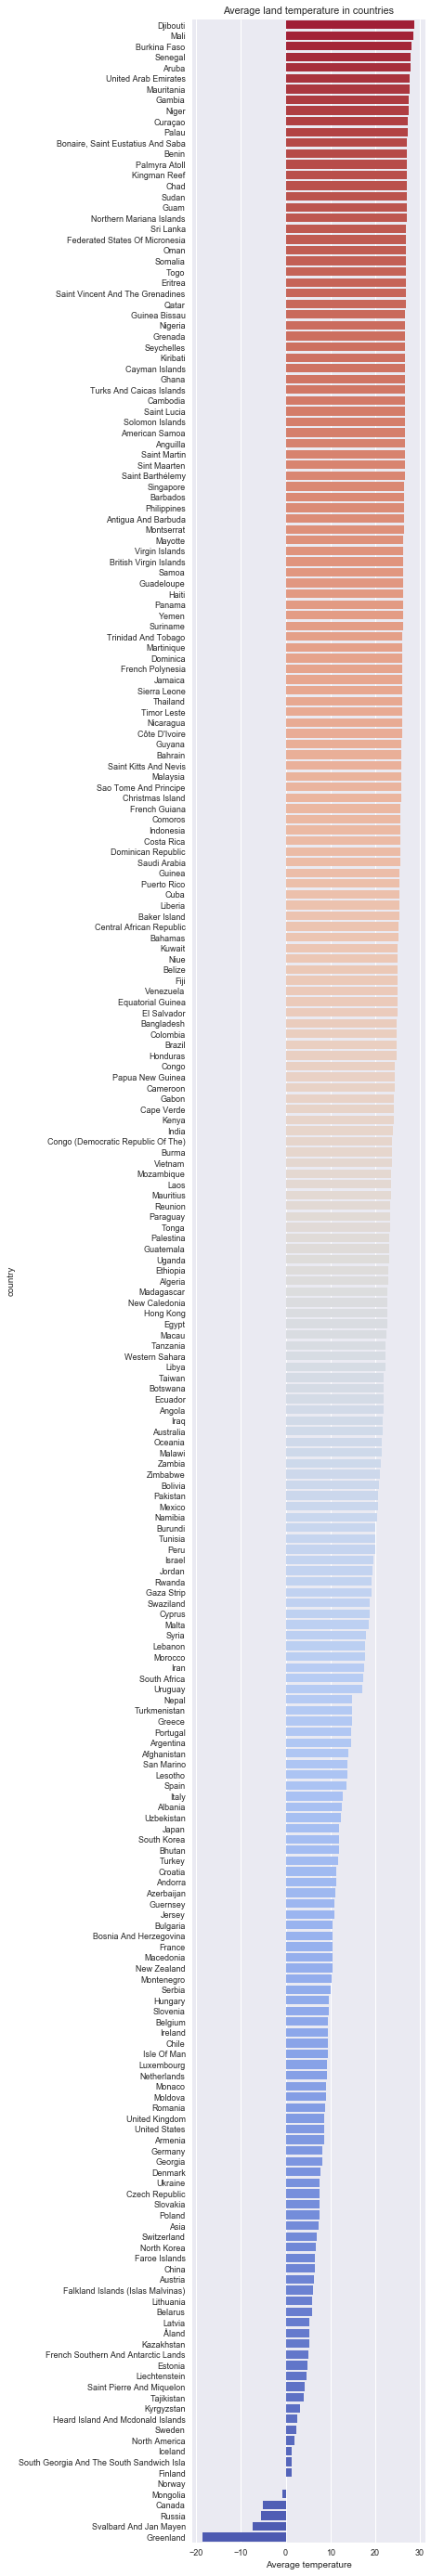

In [9]:
test = pd.DataFrame({'mean temp' : mean_temp, 'country' : countries})
test = test.sort_values(['mean temp'] , ascending = False)

mtemp = test['mean temp']
lcountry = test['country']

sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mtemp, lcountry, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')

In [10]:
df_global = pd.read_csv('D:/datasets/climate/GlobalTemperatures.csv')

In [11]:
df_global['dt'] = pd.to_datetime(df_global['dt'])

In [12]:
df_global.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_global['year'] = pd.DatetimeIndex(df_global['dt']).year

In [14]:

years = df_global['year'].unique()
mean_temp_world = []
mean_temp_world_unc = []

for year in years:
    mean_temp_world.append(df_global[df_global['year'] == year]['LandAverageTemperature'].mean())
    mean_temp_world_unc.append(df_global[df_global['year'] == year]['LandAverageTemperatureUncertainty'].mean())
    
trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_unc),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_unc),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [15]:
df_global['months'] = df_global['dt'].map(lambda x: x.month)

In [16]:
SeasonDict = {11: 'Winter', 12: 'Winter', 1: 'Winter', 2: 'Spring', 3: 'Spring', 4: 'Spring', 5: 'Summer', 6: 'Summer', 7: 'Summer', 8: 'Autumn', 9: 'Autumn', 10: 'Autumn'}
df_global['season'] = df_global['months'].map(SeasonDict)
df_global.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,months,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,Winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,Spring
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,Spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,Spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,Summer


In [17]:
trace_winter = go.Scatter(x = years, y = df_global.LandAverageTemperature[df_global.season == 'Winter'], name = 'Winter' )
trace_Spring = go.Scatter(x = years, y = df_global.LandAverageTemperature[df_global.season == 'Spring'], name = 'Spring' )
trace_Summer = go.Scatter(x = years, y = df_global.LandAverageTemperature[df_global.season == 'Summer'], name = 'Summer' )
trace_Autumn = go.Scatter(x = years, y = df_global.LandAverageTemperature[df_global.season == 'Autumn'], name = 'Autumn' )

data_season = [trace_winter,trace_Spring,trace_Summer,trace_Autumn]
layout_season = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world by seasons')
fig_season = go.Figure(data=data_season, layout=layout_season)
py.iplot(fig_season)

In [18]:
df_codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df_codes = df_codes.drop('GDP (BILLIONS)', axis = 1)
df_codes = df_codes.set_index('COUNTRY')
codes = df_codes['CODE'].to_dict()

In [19]:
data_g = [ dict(
        type = 'choropleth',
        locations = codes,
        z = df_global['LandAverageTemperature'],
        text = df_global['LandAverageTemperature'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            tickprefix = '$',
            title = 'Global average temperature'),
      ) ]

layout_g = dict(
    title = 'Global average temperature',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data_g, layout=layout_g )
py.iplot( fig )

In [20]:
df_us = df1[df1.Country== 'United States']

In [21]:
df_us['year'] = pd.DatetimeIndex(df_us['dt']).year

In [22]:
df_us.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
554880,1768-09-01,15.420,2.880,United States,1768
554881,1768-10-01,8.162,3.386,United States,1768
554882,1768-11-01,1.591,3.783,United States,1768
554883,1768-12-01,-2.882,4.979,United States,1768
554884,1769-01-01,-3.952,4.856,United States,1769


In [23]:
df_us2 = df_us.groupby('year').mean()
df_us2 = df_us2.reset_index()
df_us2 = df_us2[df_us2.year >= 1823]

In [24]:
trace1 = go.Scatter(x = df_us2.year, y = df_us2.AverageTemperature)

data1 = [trace1]
layout1 = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in the USA')
fig1 = go.Figure(data=data1, layout=layout1)
py.iplot(fig1)

In [25]:
df_states = pd.read_csv('D:/datasets/climate/GlobalLandTemperaturesByState.csv')
df_us = df_states[df_states.Country == 'United States' ]

In [26]:
df_us = df_us.groupby('State').mean()
df_us = df_us.reset_index()
df_us.head()

,State,AverageTemperature,AverageTemperatureUncertainty
0,Alabama,17.066138,1.439645
1,Alaska,-4.890738,1.671122
2,Arizona,15.381526,0.725007
3,Arkansas,15.573963,1.320205
4,California,14.327677,0.579960


In [27]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}


In [28]:
df_us['states'] = df_us['State'].map(us_state_abbrev)
df_us.head()

,State,AverageTemperature,AverageTemperatureUncertainty,states
0,Alabama,17.066138,1.439645,AL
1,Alaska,-4.890738,1.671122,AK
2,Arizona,15.381526,0.725007,AZ
3,Arkansas,15.573963,1.320205,AR
4,California,14.327677,0.579960,CA


In [29]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data_us = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_us['states'],
        z = df_us['AverageTemperature'],
        locationmode = 'USA-states',
        text = df_us['AverageTemperature'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "average temp")
        ) ]
layout_us = dict(
        title = 'Average temperature of the united states',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data_us, layout=layout_us )
py.iplot( fig )

In [30]:
df_states = pd.read_csv('D:/datasets/climate/GlobalLandTemperaturesByState.csv')
df_us2 = df_states[df_states.Country == 'United States' ]
df_us2['dt'] = pd.to_datetime(df_us2['dt'])
df_us2['Year'] = pd.DatetimeIndex(df_us2['dt']).year.astype(int)
df_us2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year
7458,1743-11-01,10.722,2.898,Alabama,United States,1743
7459,1743-12-01,NaN,NaN,Alabama,United States,1743
7460,1744-01-01,NaN,NaN,Alabama,United States,1744
7461,1744-02-01,NaN,NaN,Alabama,United States,1744
7462,1744-03-01,NaN,NaN,Alabama,United States,1744


In [31]:
tracetx = go.Scatter(x = years, y= df_us2.AverageTemperature[df_us2.State == 'Texas'], name = 'Texas')
traceca = go.Scatter(x = years, y= df_us2.AverageTemperature[df_us2.State == 'Califoria'], name = 'California')
tracewa = go.Scatter(x = years, y= df_us2.AverageTemperature[df_us2.State == 'Washington'], name = 'Washington')
tracefl = go.Scatter(x = years, y= df_us2.AverageTemperature[df_us2.State == 'Florida'], name = 'Florida')
traceny = go.Scatter(x = years, y= df_us2.AverageTemperature[df_us2.State == 'New York'], name = 'New York')

data_l = [tracetx, tracewa, traceca, tracefl, traceny]
layout_1 = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature for Texas, California, Washington, Florida and New york')
fig_1 = go.Figure(data=data_l, layout=layout_1)
py.iplot(fig_1)

In [32]:
df_us2 = df_us2.groupby(['State','Year']).mean()

In [33]:
df_us2 = df_us2.reset_index()
df_us2['states'] = df_us2['State'].map(us_state_abbrev)
df_us2.head()
df_us2.head()

,State,Year,AverageTemperature,AverageTemperatureUncertainty,states
0,Alabama,1743,10.72200,2.898000,AL
1,Alabama,1744,18.45100,2.854125,AL
2,Alabama,1745,10.89575,2.773500,AL
3,Alabama,1746,NaN,NaN,AL
4,Alabama,1747,NaN,NaN,AL


In [34]:
us_mean = df_us.AverageTemperature.mean()

In [35]:
data_us1 = [go.Bar(
            y=df_us.AverageTemperature - us_mean,
            x=years,
            text=df_us.states,
            textposition = 'auto',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.8
        )]

layout_us1 = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature for states in the USA')
fig_us1 = go.Figure(data=data_us1, layout=layout_us1)
py.iplot(fig_us1)